In [1]:
import numpy as np
from PIL import Image
import os
from random import randint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint,LambdaCallback
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

In [3]:
lookup = {}
reverselookup = {}
count = 0

# Iterate through gesture directories
for gesture_dir in os.listdir('D:\\prodigy\\task4\\leapGestRecog\\leapGestRecog\\00'):
    if not gesture_dir.startswith('.'):  # Ignore hidden files/directories
        lookup[gesture_dir] = count
        reverselookup[count] = gesture_dir
        count += 1

# Print the lookup dictionary
print("Lookup Dictionary:")
print(lookup)

Lookup Dictionary:
{'01_palm': 0, '02_l': 1, '03_fist': 2, '04_fist_moved': 3, '05_thumb': 4, '06_index': 5, '07_ok': 6, '08_palm_moved': 7, '09_c': 8, '10_down': 9}


In [5]:
x_data = []
y_data = []
datacount = 0

for i in range(10):  
    for j in os.listdir('D:\\prodigy\\task4\\leapGestRecog\\leapGestRecog\\0' + str(i) + '/'):
        if not j.startswith('.'):  
            count = 0 
            for k in os.listdir('D:\\prodigy\\task4\\leapGestRecog\\leapGestRecog\\0' + str(i) + '/' + j + '/'):
                
                img = Image.open('D:\\prodigy\\task4\\leapGestRecog\\leapGestRecog\\0' + str(i) + '/' + j + '/' + k).convert('L')
               
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr)
                count += 1
            y_values = np.full((count, 1), lookup[j])
            y_data.extend(y_values)
            datacount += count

x_data = np.array(x_data, dtype='float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) 

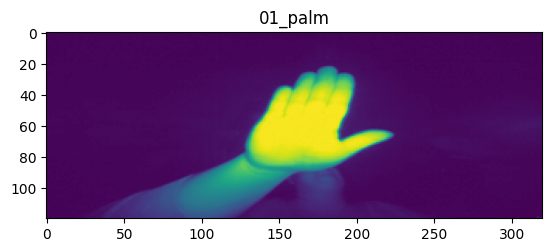

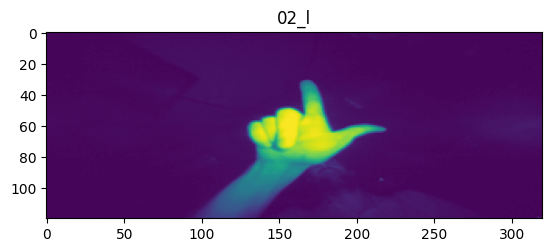

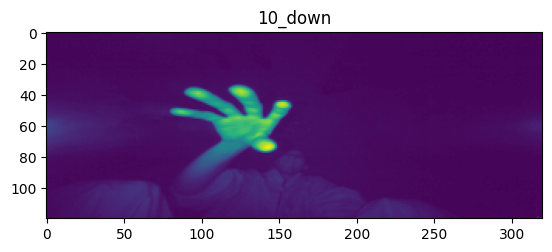

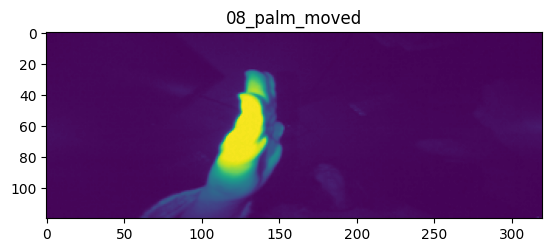

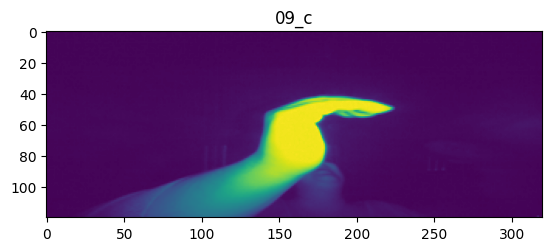

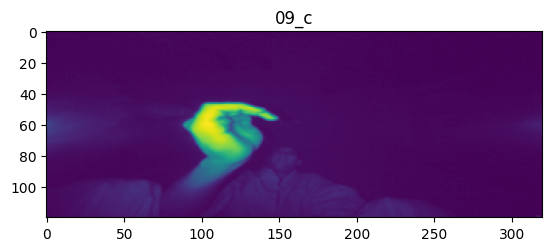

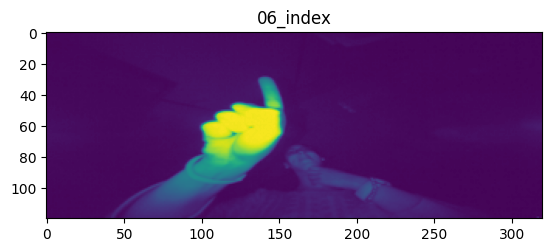

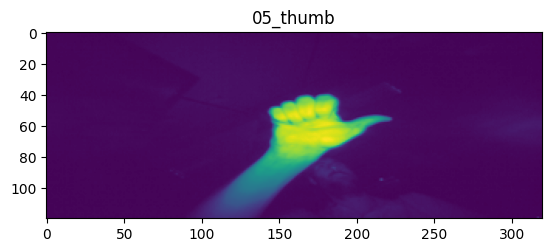

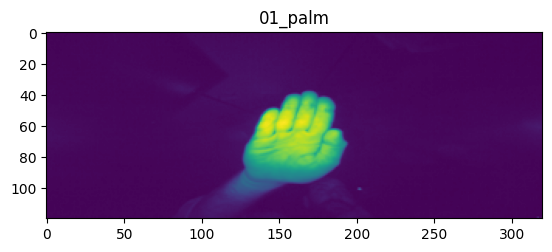

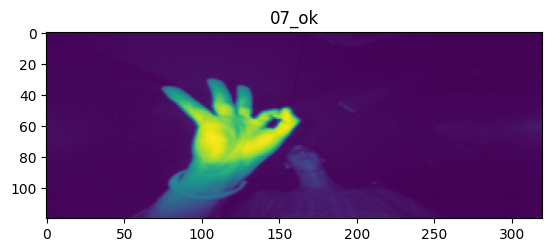

In [6]:
from random import randint
import matplotlib.pyplot as plt


num_images = 10
num_samples = len(x_data)

for _ in range(num_images):
    index = randint(0, num_samples - 1)  
    plt.imshow(x_data[index])  
    plt.title(reverselookup[y_data[index, 0]])  
    plt.show()

In [7]:
x_data = x_data.reshape((x_data.shape[0], 120, 320, 1))
x_data.shape

(20000, 120, 320, 1)

In [8]:
x_data /= 255
x_data[0]

array([[[0.01960784],
        [0.01960784],
        [0.01960784],
        ...,
        [0.01176471],
        [0.01176471],
        [0.01176471]],

       [[0.01960784],
        [0.01960784],
        [0.01960784],
        ...,
        [0.01176471],
        [0.01568628],
        [0.01176471]],

       [[0.01960784],
        [0.01568628],
        [0.01568628],
        ...,
        [0.01176471],
        [0.01568628],
        [0.01568628]],

       ...,

       [[0.01568628],
        [0.01568628],
        [0.01960784],
        ...,
        [0.01960784],
        [0.02352941],
        [0.01960784]],

       [[0.01568628],
        [0.01960784],
        [0.01568628],
        ...,
        [0.01176471],
        [0.01568628],
        [0.01960784]],

       [[0.01568628],
        [0.01960784],
        [0.01568628],
        ...,
        [0.11372549],
        [0.03137255],
        [0.03921569]]], dtype=float32)

In [9]:
y_data = to_categorical(y_data)
y_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
# Split data into training, validation, and test sets
x_train, x_further, y_train, y_further = train_test_split(x_data, y_data, test_size=0.2)
x_validate, x_test, y_validate, y_test = train_test_split(x_further, y_further, test_size=0.5)

In [11]:
model = Sequential()
model.add(Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 58, 158, 32)    │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 36, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 18, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       737,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 794,954 (3.03 MB)

 Trainable params: 794,954 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [16]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint, LambdaCallback

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)

# Define model checkpoint callback to save best model weights
model_checkpoint = ModelCheckpoint('best_model_weights.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train model with all callbacks
history = model.fit(x_train, y_train, epochs=100, batch_size=128, verbose=1, 
                    validation_data=(x_validate, y_validate), 
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 1.0000 - loss: 2.0752e-05
Epoch 1: val_accuracy improved from -inf to 0.99950, saving model to best_model_weights.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 88s 665ms/step - accuracy: 1.0000 - loss: 2.0724e-05 - val_accuracy: 0.9995 - val_loss: 0.0010
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 1.0000 - loss: 1.3380e-05
Epoch 2: val_accuracy did not improve from 0.99950
125/125 ━━━━━━━━━━━━━━━━━━━━ 73s 580ms/step - accuracy: 1.0000 - loss: 1.3383e-05 - val_accuracy: 0.9995 - val_loss: 0.0010
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 1.0000 - loss: 1.2633e-05
Epoch 3: val_accuracy did not improve from 0.99950
125/125 ━━━━━━━━━━━━━━━━━━━━ 67s 532ms/step - accuracy: 1.0000 - loss: 1.2623e-05 - val_accuracy: 0.9995 - val_loss: 0.0011
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 1.0000 - loss: 9.2500e-06
Epoch 4: val_accuracy did not improve from 0.99950
125/125 ━

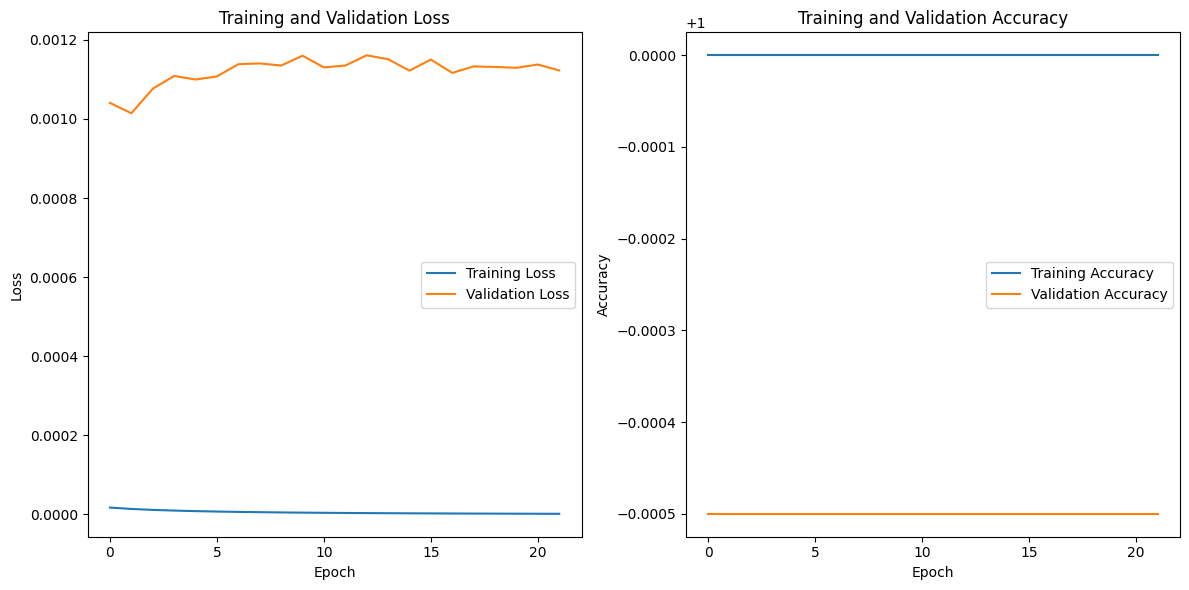

In [20]:
import matplotlib.pyplot as plt


# Plot training history
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# Evaluate model on test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9999 - loss: 1.3899e-04
Test Loss: 0.0005266933003440499
Test Accuracy: 0.9994999766349792
